# DFT Geometry Optimization and AMBER panels for sucrose

In [1]:
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import os
from os.path import *
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from scipy.stats import gaussian_kde

In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
molids = ['25_dgo']
names = ['Sucrose']
adducts = ['+De']

### Can be used to map different bar clusters to parts of the MD, DFT energy cloud. 

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


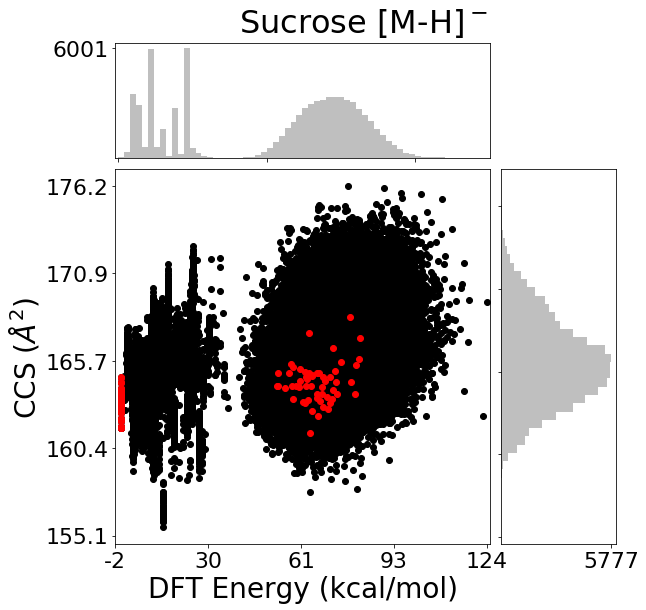

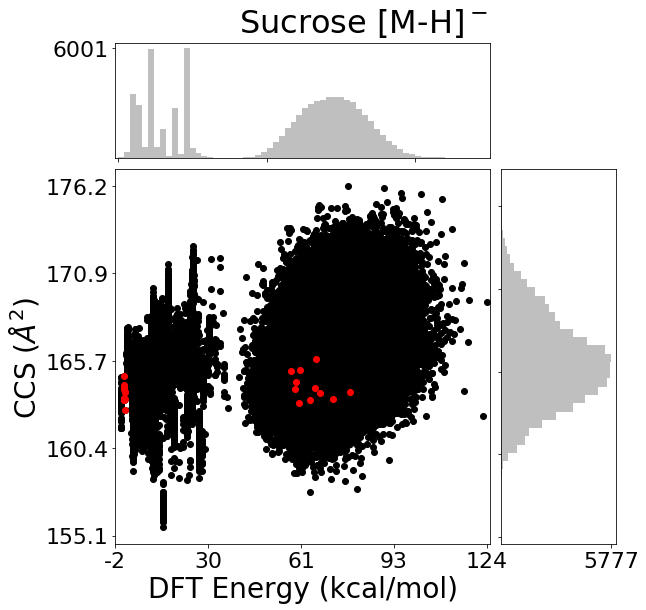

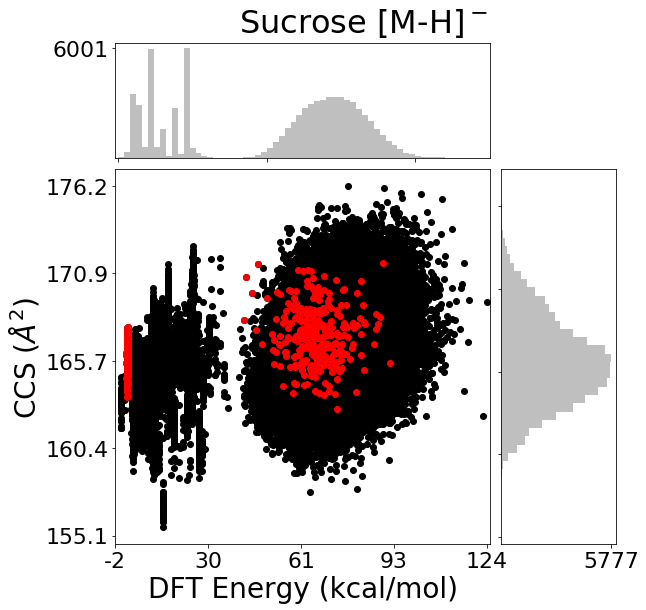

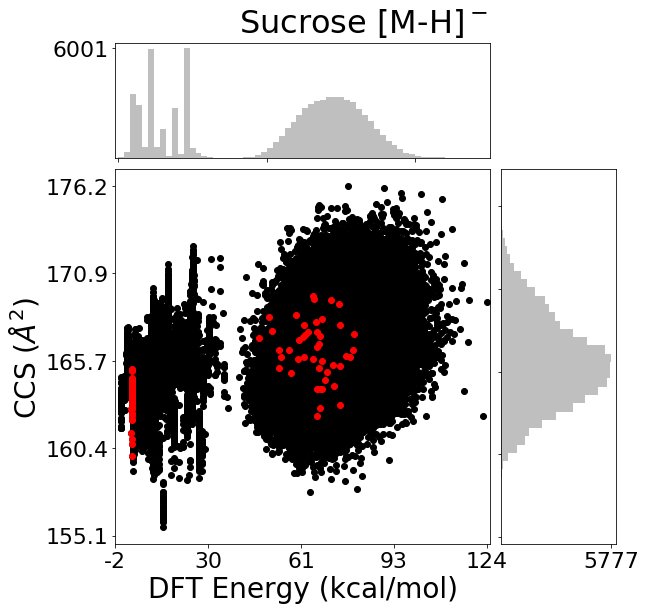

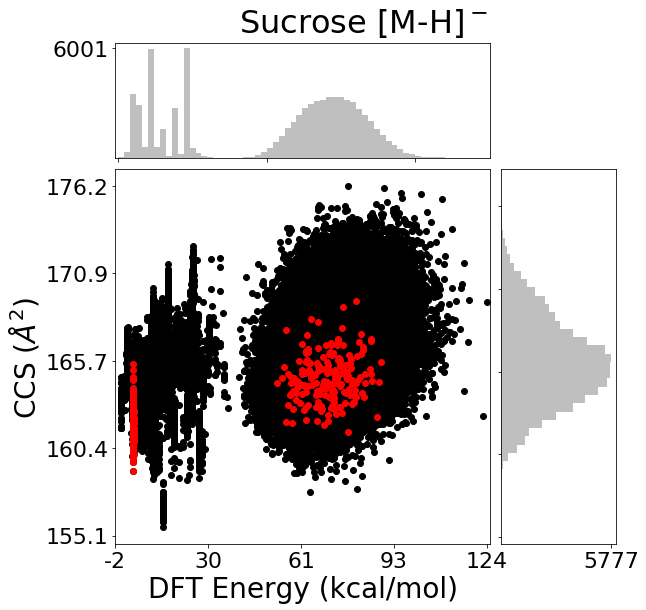

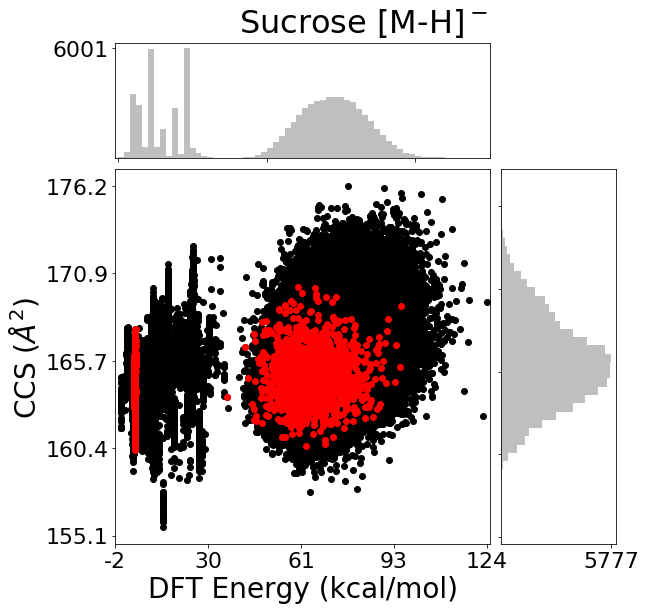

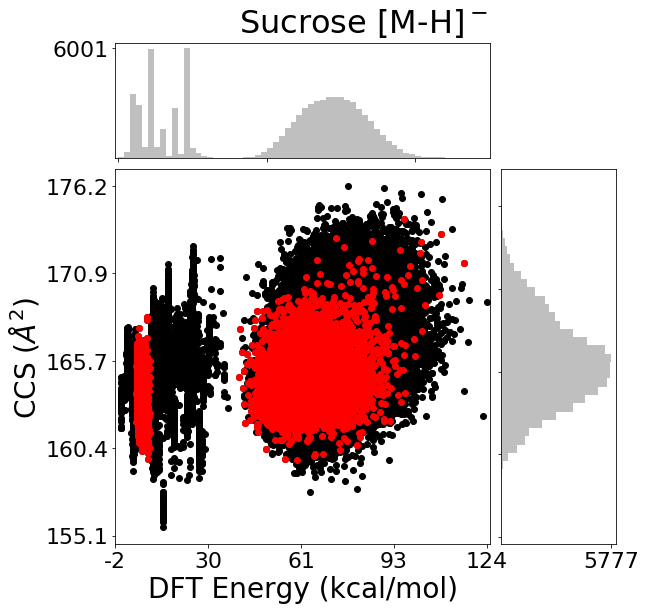

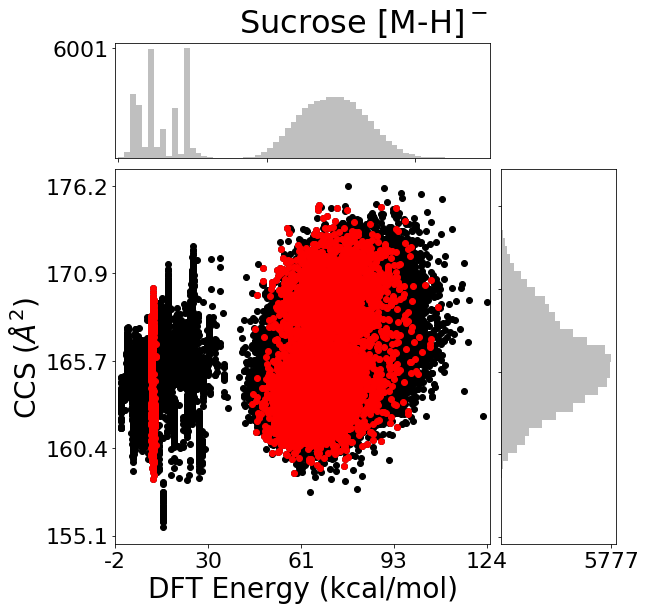

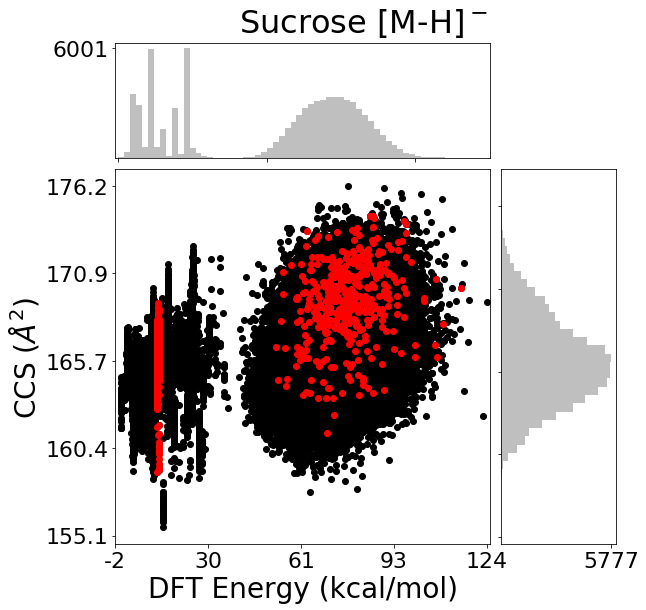

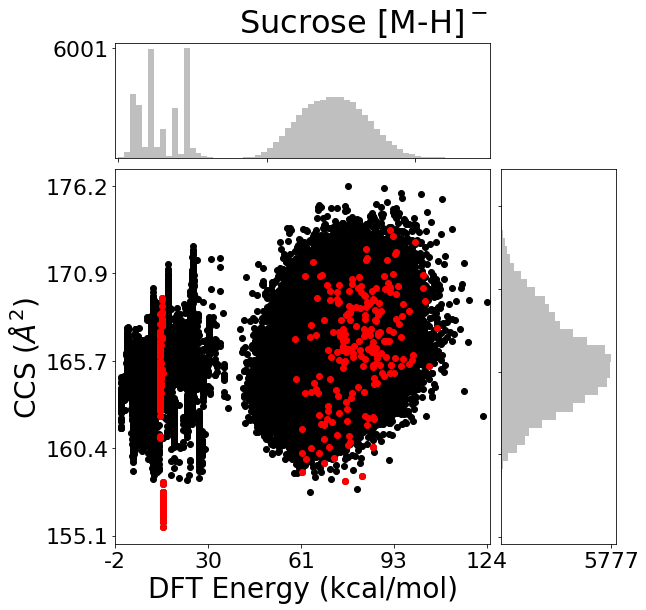

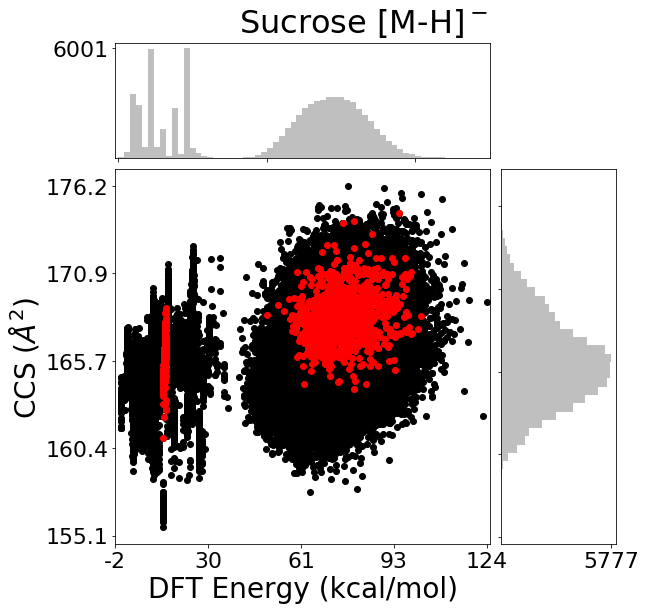

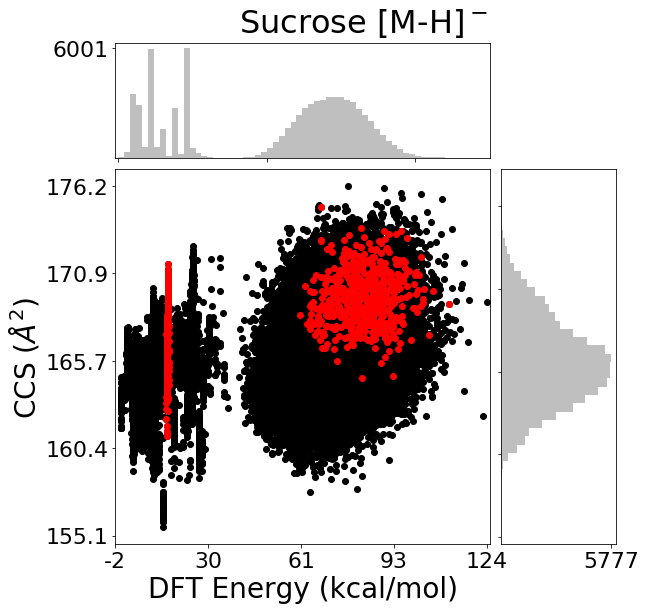

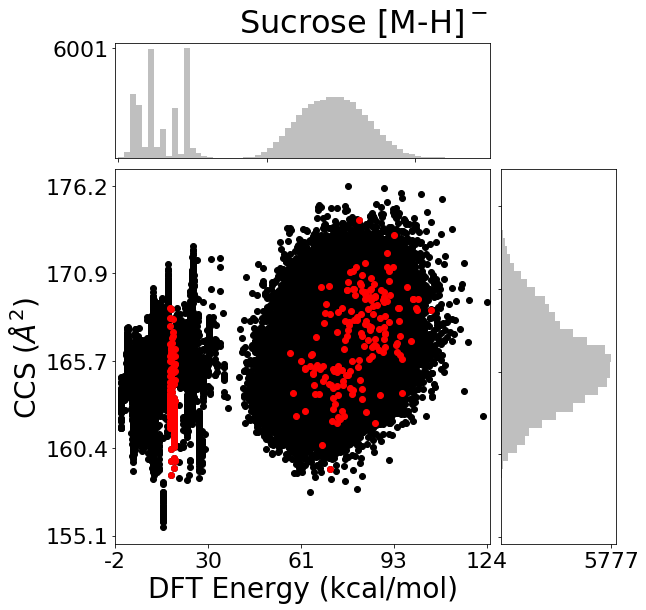

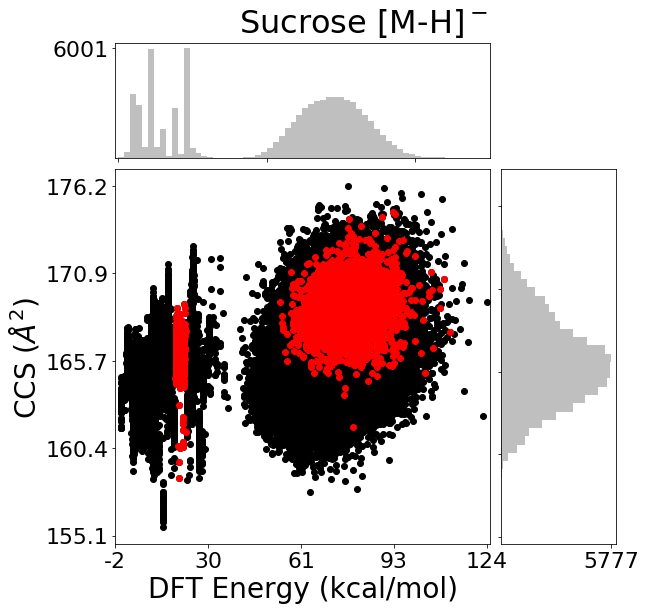

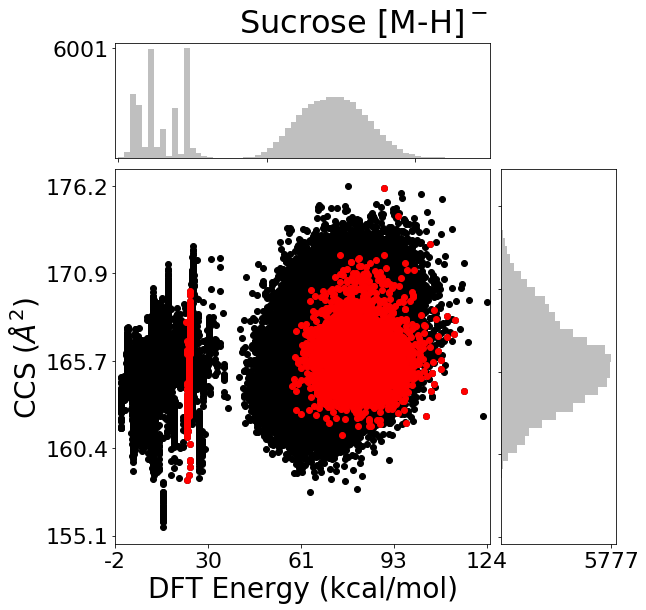

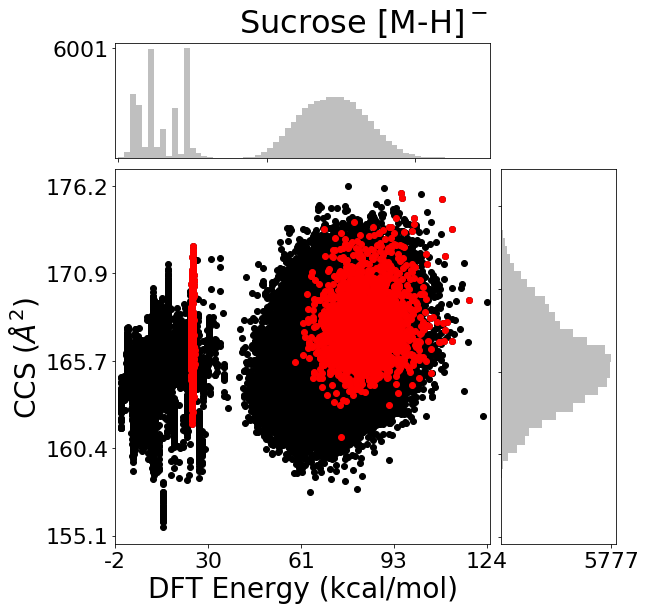

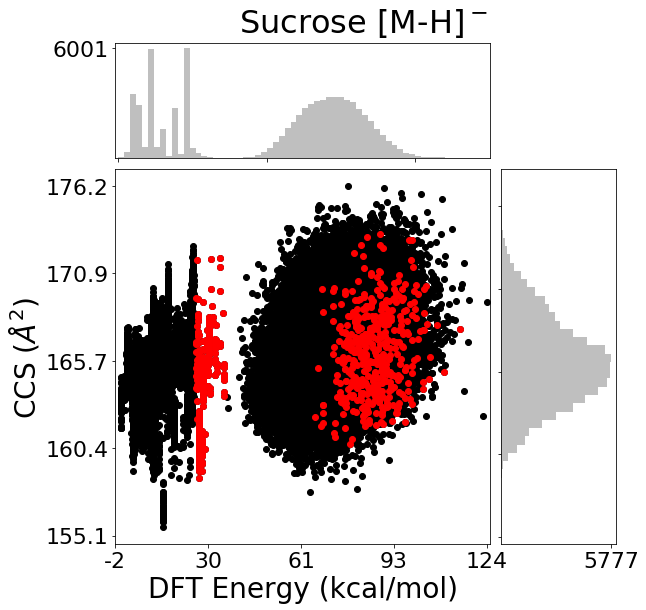

In [3]:
ID = '25_dgo'
ID2 = '25'
#file = f'../data/molid{ID}_ccs.csv'
file = f'../data/molid{ID}_ccs_filled50k.csv'
file2 = f'../data/molid{ID2}_ccs.csv'

df1 = pd.read_csv(file)
df2 = pd.read_csv(file2) #, index_col=0)
evc_df = df1.append(df2)

# Set the minimum energy to 0 and scale the rest accordingly.
# Comment these out to restore specific DFT energy values
# Which are meaningless to compare across molecules

# Find minimum energy relative to all conformers
allE = evc_df['dft_energy'].values
allE *= 627.509
mn = np.nanmin(allE)
allE -= mn
evc_df['dft_energy'] = allE #[:-len(crestE)]

# Also define array with all CCS for plot boundaries
allCCS = evc_df['ccs'].values #np.append(evc_df['ccs'].values, crestCCS)

# Update separate dataframes as well to use in the line connections
df1['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
df2['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
df1['dft_energy'] -= mn #df1['dft_energy'] - min
df2['dft_energy'] -= mn #df2['dft_energy'] - min

x = evc_df['dft_energy']
y = evc_df['ccs']

nullfmt = NullFormatter()

# Define the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

boundaries = [0,0.5,1.25,3,3.8,4.35,5,10,12,13,14.1,15.3,16.4,18.3,22,23.5,25,np.max(x)]
for b, bound in enumerate(boundaries[1:], start=1):
    plt.figure(1, figsize=(8, 8))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # Generate color by density
    #xy = np.vstack([x,y])
    #z = gaussian_kde(xy)(xy)
    z = 'black'
    # the scatter plot:
    axScatter.scatter(x, y, c=z)

    binwidth = 0.25

    #axScatter.set_xlim((np.nanmin(x)-0.0015,np.nanmax(x)+0.0015))
    axScatter.set_xlim((np.nanmin(x)-1,np.nanmax(x)+1))
    axScatter.set_ylim((np.nanmin(y)-1,np.nanmax(y)+1))
    axScatter.set_ylabel('CCS ($\AA^2$)', fontsize=28)
    axScatter.set_xlabel('DFT Energy (kcal/mol)', fontsize=28)
    #axScatter.axvline(-687.73, color='red')
    #axScatter.axvline(-687.72, color='red')

    binwidthx = 2
    binwidthy = 0.5
    binx = np.arange(np.nanmin(x), np.nanmax(x), binwidthx)
    biny = np.arange(np.nanmin(y), np.nanmax(y), binwidthy)
    hxy, hxx, _ = axHistx.hist(x, bins=binx, color='#bfbfbf')
    hyy, hyx, _ = axHisty.hist(y, bins=biny, orientation='horizontal', color='#bfbfbf')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    #axHistx.set_xticklabels(x_ticks, rotation=0, fontsize=12)
    #axHisty.set_yticklabels(y_ticks, rotation=0, fontsize=2)


    # Adjust tick sizes and fonts
    axHistx.tick_params(axis='both', which='major', labelsize=22)
    axHisty.tick_params(axis='both', which='major', labelsize=22)
    axScatter.tick_params(axis='both', which='major', labelsize=22)

    axScatter.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    axScatter.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

    # Define energy clusters for "arrow" mapping
    clusters = [[0,1], [1,6], [6,9.5], [9.5, np.nanmax(allE)]]

    # Map simulated annealing to DFT geom opt results
    np.random.seed(1)

    # Uncomment to map all of one cluster
    arr = [x for x in range(len(df1['dft_energy']))]
    for r in arr:
        E = df1['dft_energy'][r]
        #if E >= 9.5 and E < np.nanmax(allE):
        if E >= boundaries[b-1] and E < boundaries[b]:
            color = 'ro'
            axScatter.plot([df1['dft_energy'][r],df2['dft_energy'][r]], [df1['ccs'][r],df2['ccs'][r]], color)

    #xtic = np.linspace(np.nanmin(x)-0.01, np.nanmax(x)+0.01, 3) # For using real DFT values
    xtic = np.linspace(np.nanmin(allE-2), np.nanmax(allE), 5)
    ytic = np.linspace(np.nanmin(allCCS-0.5), np.nanmax(allCCS), 5)
    axScatter.set_xticks(xtic)
    axScatter.set_yticks(ytic)

    axHistx.set_yticks([hxy.max()])
    axHisty.set_xticks([hyy.max()])

    plt.title(f'Sucrose [M-H]$^-$', fontsize=32, y=1.35, x=-1.2)


    plt.show()

they are shifted to make a comparison between the datasets


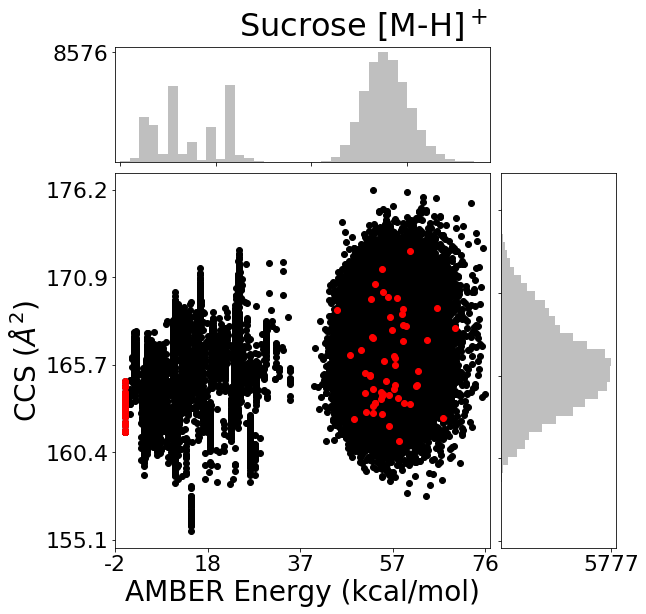

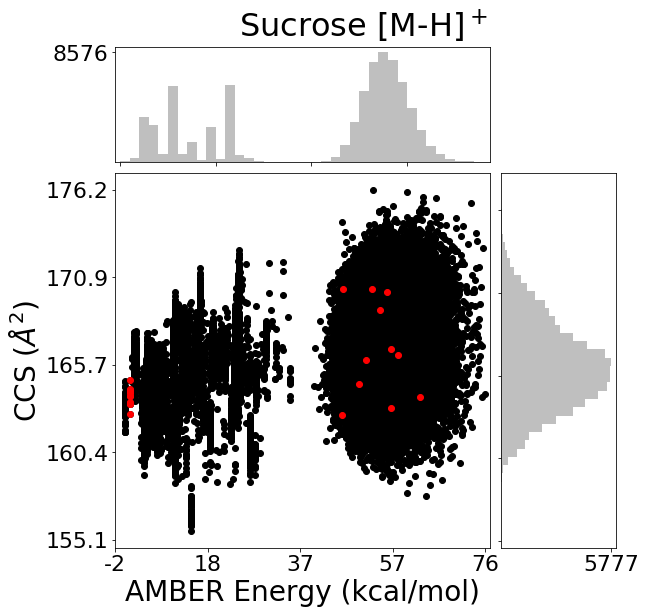

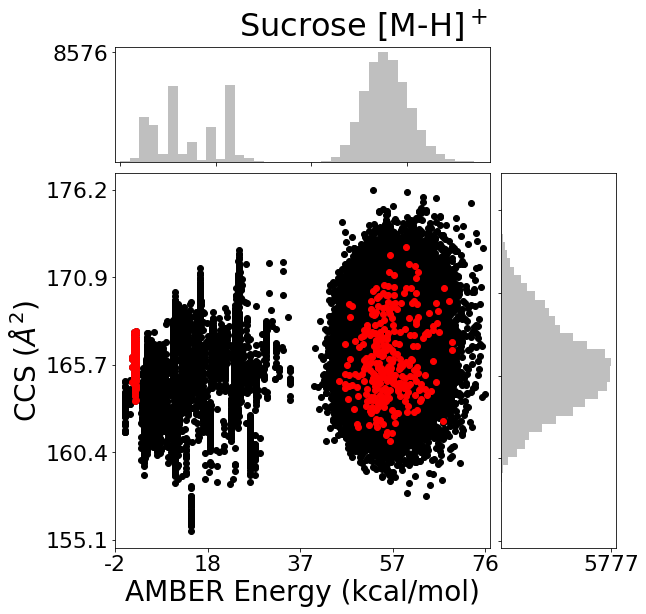

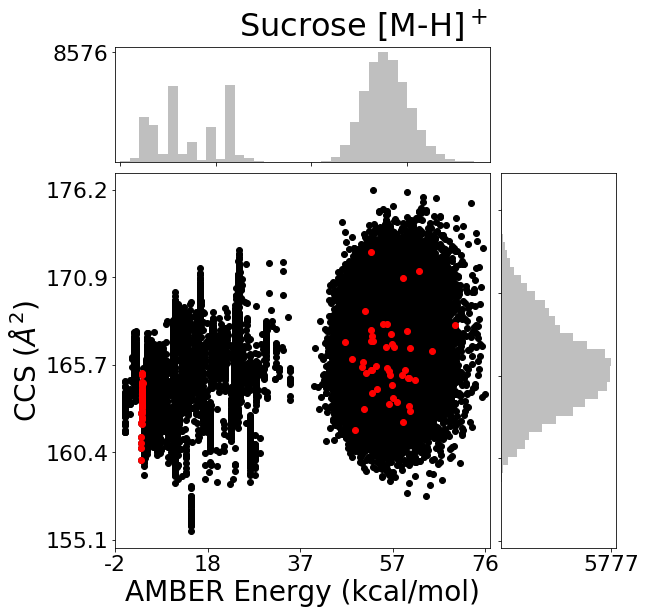

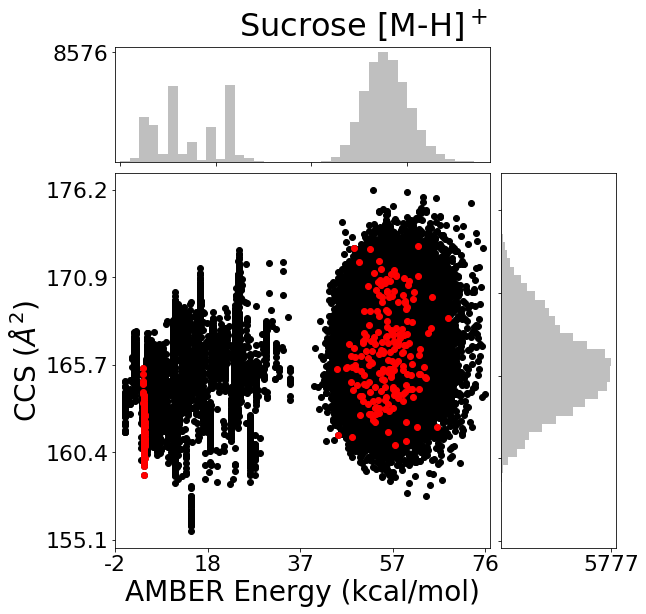

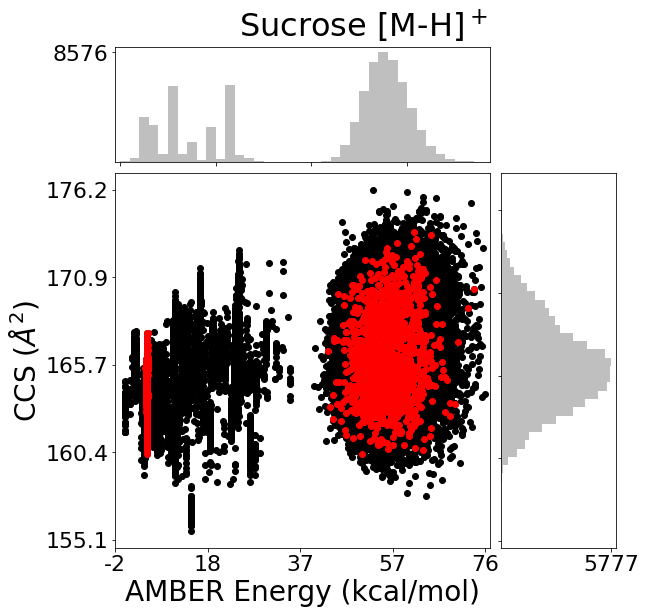

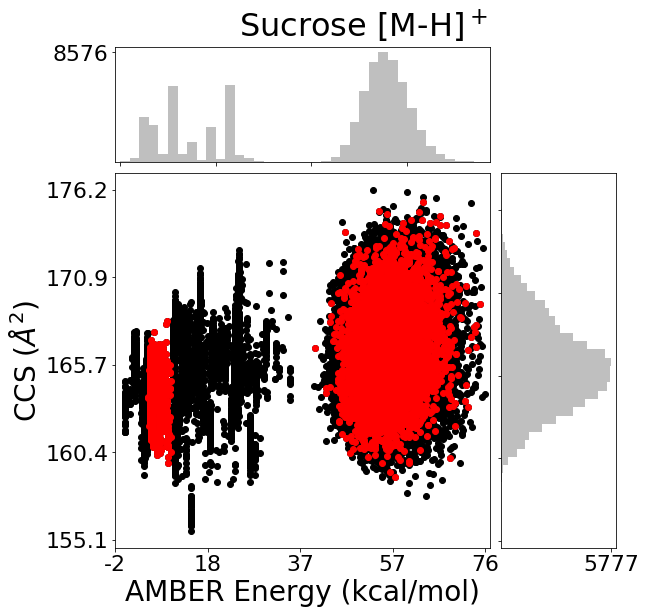

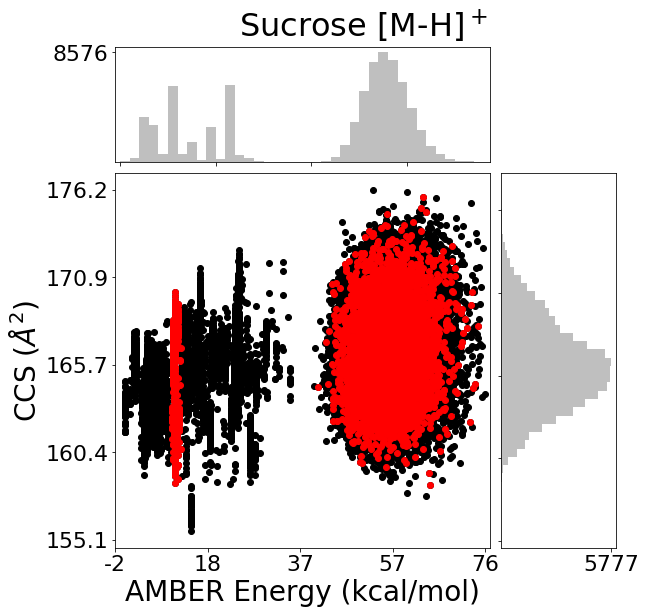

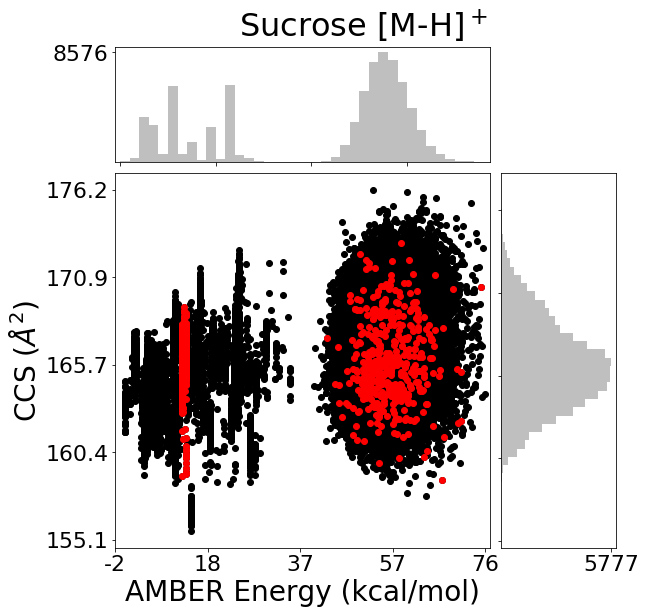

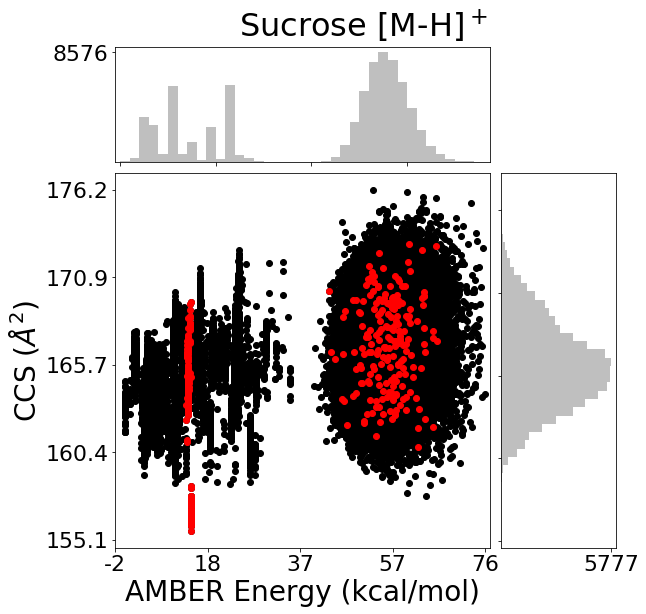

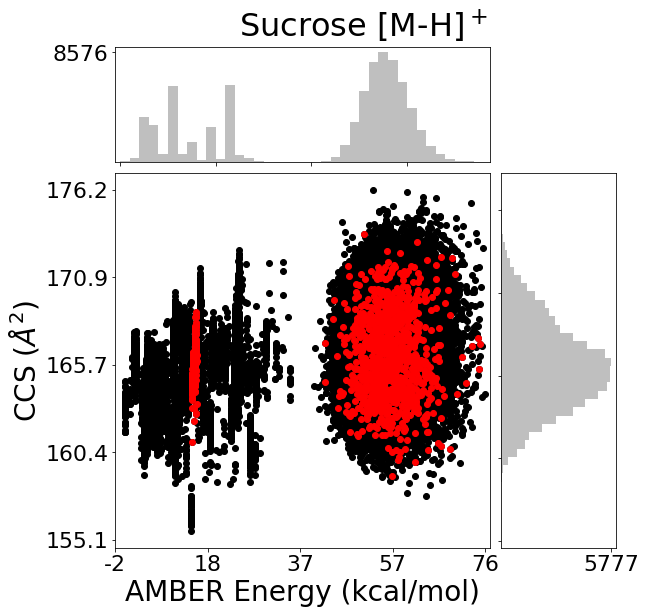

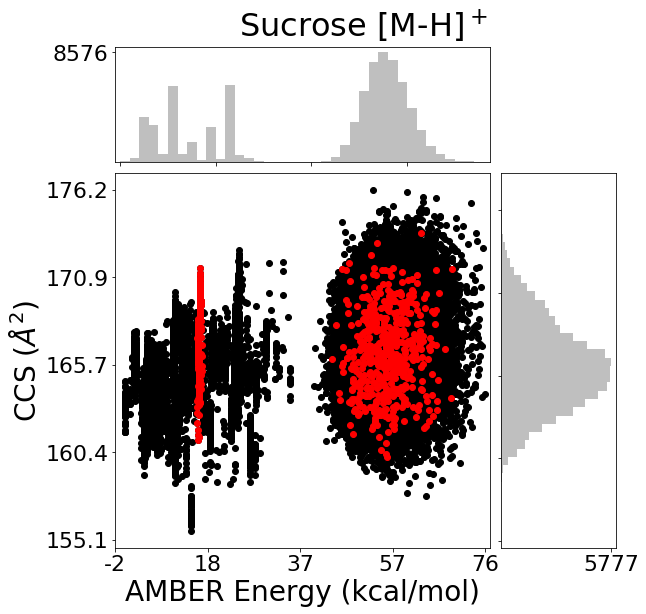

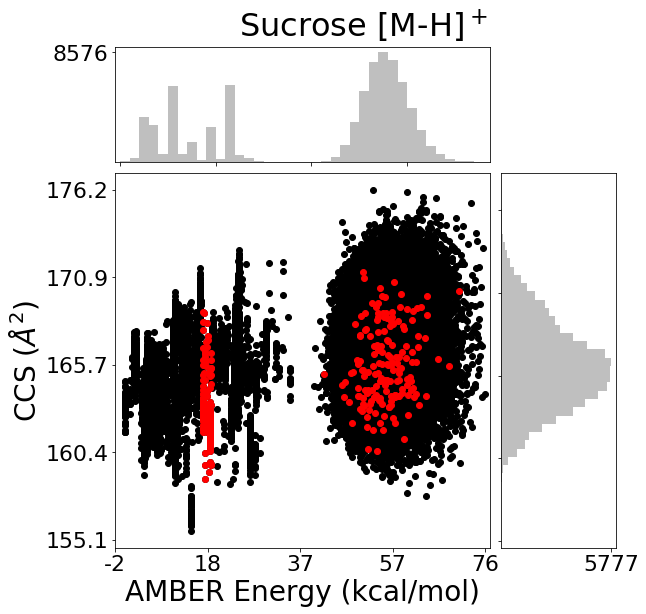

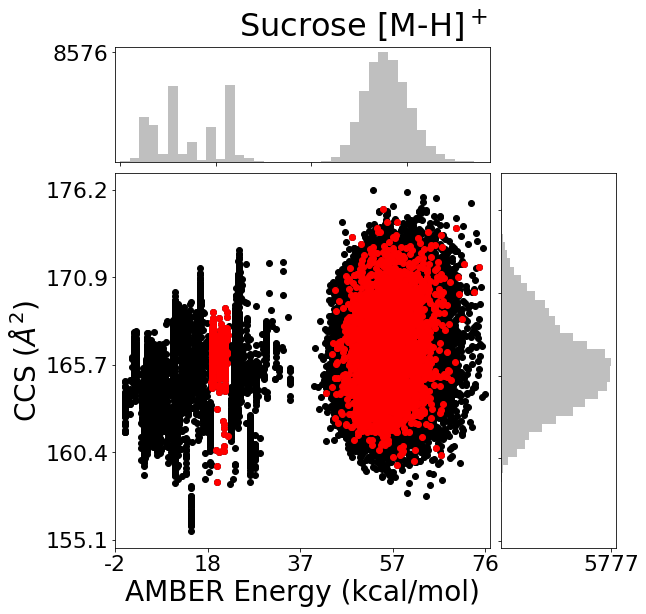

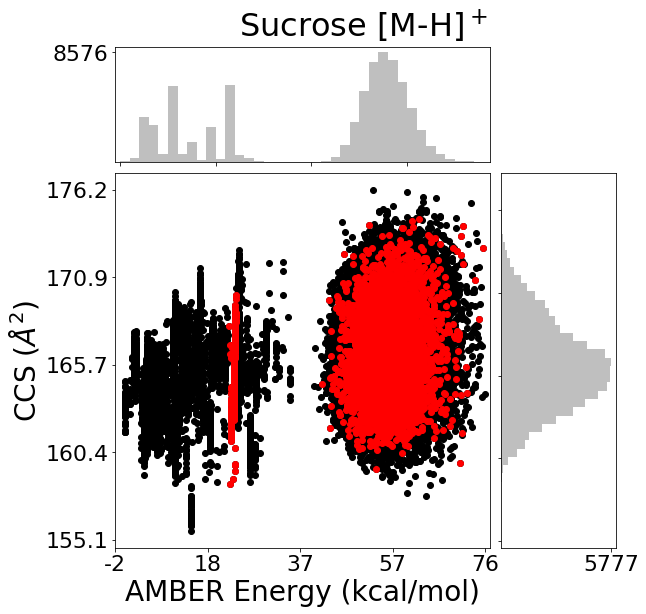

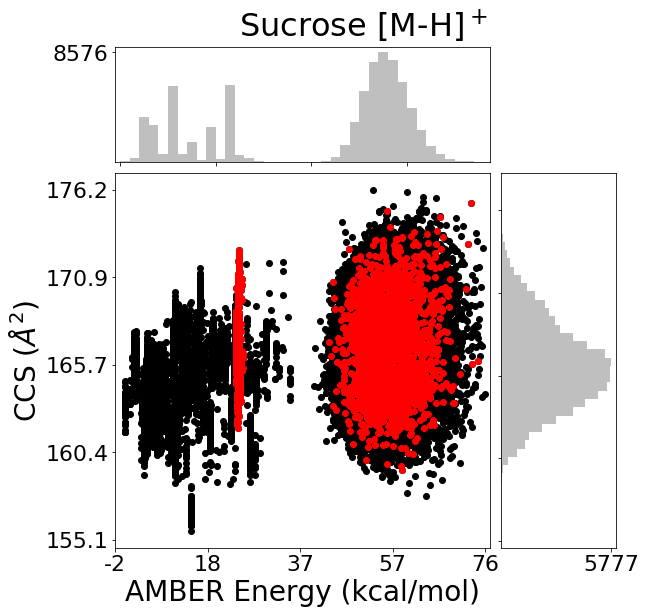

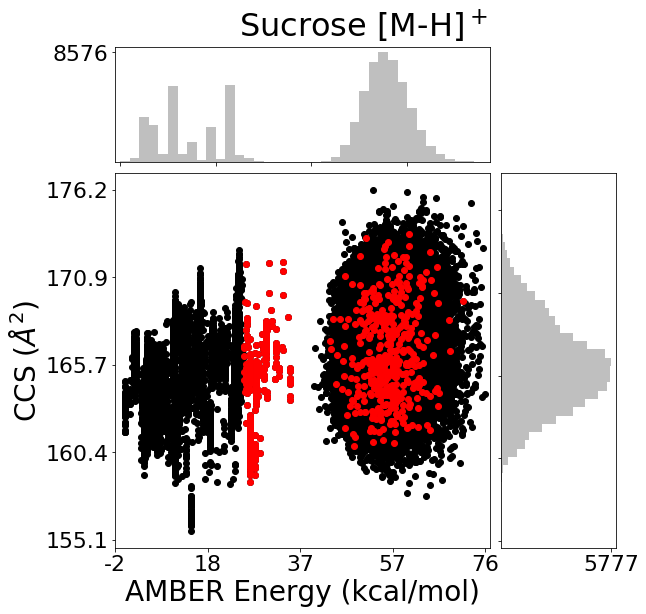

In [5]:
# Same as above except for AMBER potential energies
print('WARNING: AMBER energy values seen here are not the actual values')
print('they are shifted to make a comparison between the datasets')

ID = '25_dgo'
ID2 = '25-H'
#file = f'../data/molid{ID}_ccs.csv'a
file = f'../data/molid{ID}_ccs_filled50k.csv'
file2 = f'../data/molid{ID2}_amber_dft_ccs.csv'

df1 = pd.read_csv(file)
df2 = pd.read_csv(file2)

df1['dft_energy'] *= 627.509
df1['dft_energy'] -= np.nanmin(df1['dft_energy'])
df2['EPtot'] -= np.nanmin(df2['EPtot']) - 40


allE = np.append(df1['dft_energy'].values, df2['EPtot'].values)
allC = np.append(df1['ccs'].values, df2['ccs'].values)

x = allE
y = allC

nullfmt = NullFormatter()

# Define the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

boundaries = [0,0.5,1.25,3,3.8,4.35,5,10,12,13,14.1,15.3,16.4,18.3,22,23.5,25,40]
for b, bound in enumerate(boundaries[1:], start=1):
    plt.figure(1, figsize=(8, 8))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # Generate color by density
    #xy = np.vstack([x,y])
    #z = gaussian_kde(xy)(xy)
    z = 'black'
    # the scatter plot:
    axScatter.scatter(x, y, c=z)

    binwidth = 0.25

    #axScatter.set_xlim((np.nanmin(x)-0.0015,np.nanmax(x)+0.0015))
    axScatter.set_xlim((np.nanmin(x)-1,np.nanmax(x)+1))
    axScatter.set_ylim((np.nanmin(y)-1,np.nanmax(y)+1))
    axScatter.set_ylabel('CCS ($\AA^2$)', fontsize=28)
    axScatter.set_xlabel('AMBER Energy (kcal/mol)', fontsize=28)
    #axScatter.axvline(-687.73, color='red')
    #axScatter.axvline(-687.72, color='red')

    binwidthx = 2
    binwidthy = 0.5
    binx = np.arange(np.nanmin(x), np.nanmax(x), binwidthx)
    biny = np.arange(np.nanmin(y), np.nanmax(y), binwidthy)
    hxy, hxx, _ = axHistx.hist(x, bins=binx, color='#bfbfbf')
    hyy, hyx, _ = axHisty.hist(y, bins=biny, orientation='horizontal', color='#bfbfbf')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())
    #axHistx.set_xticklabels(x_ticks, rotation=0, fontsize=12)
    #axHisty.set_yticklabels(y_ticks, rotation=0, fontsize=2)


    # Adjust tick sizes and fonts
    axHistx.tick_params(axis='both', which='major', labelsize=22)
    axHisty.tick_params(axis='both', which='major', labelsize=22)
    axScatter.tick_params(axis='both', which='major', labelsize=22)

    axScatter.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    axScatter.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

    # Define energy clusters for "arrow" mapping
    clusters = [[0,1], [1,6], [6,9.5], [9.5, np.nanmax(allE)]]

    # Map simulated annealing to DFT geom opt results
    np.random.seed(1)

    # Uncomment to map all of one cluster
    arr = [x for x in range(len(df1['dft_energy']))]
    for r in arr:
        E = df1['dft_energy'][r]
        #if E >= 9.5 and E < np.nanmax(allE):
        if E >= boundaries[b-1] and E < boundaries[b]:
            color = 'ro'
            axScatter.plot([df1['dft_energy'][r],df2['EPtot'][r]], [df1['ccs'][r],df2['ccs'][r]], color)

    #xtic = np.linspace(np.nanmin(x)-0.01, np.nanmax(x)+0.01, 3) # For using real DFT values
    xtic = np.linspace(np.nanmin(allE-2), np.nanmax(allE), 5)
    ytic = np.linspace(np.nanmin(allCCS-0.5), np.nanmax(allCCS), 5)
    axScatter.set_xticks(xtic)
    axScatter.set_yticks(ytic)

    axHistx.set_yticks([hxy.max()])
    axHisty.set_xticks([hyy.max()])

    plt.title(f'Sucrose [M-H]$^+$', fontsize=32, y=1.35, x=-1.2)


    plt.show()

### Four panel comparing DFT energy on AMBER structures to DFT geometry optimized results 

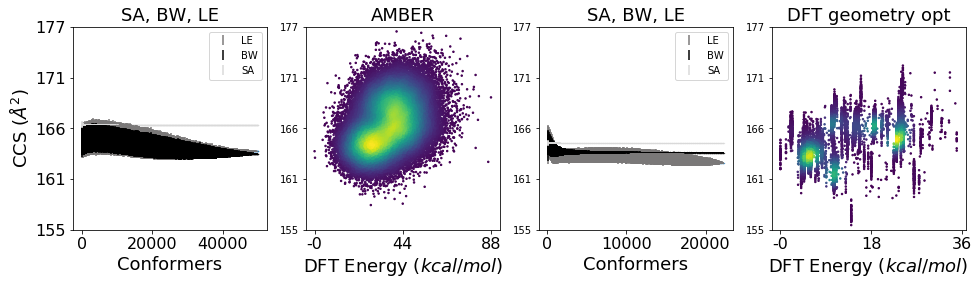

In [6]:
N = 50000

for i, ID in enumerate(['25']):

    # Set global figure
    plt.figure(figsize=(16,4))
    
    
    ####------------
    # Plot CCS vs DFT energy. We plot this first in the script so we
     # can grab the y axis limits
    ax2 = plt.subplot(1,4,2)
    MD = pd.read_csv(f'../data/molid{ID}_ccs.csv')   
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    # Comment these out to restore specific DFT energy values
    # Which apparently is meaningless to compare to each other
    MD['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    MD['dft_energy'] -= MD['dft_energy'].min()
    
    # Generate color by density
    x = MD['dft_energy']
    y = MD['ccs']
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    #z = 'black'

    plt.scatter(x, y, c=z, s=2.2)
    plt.xlabel('DFT Energy $\it{(kcal/mol)}$', fontsize=18)
    #plt.title(f'{names[i]} [M{adducts[i]}]$^{adducts[i][0]}$', fontsize=18)
    plt.title('AMBER', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    
    xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3)
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    ax2.set_xticks(xtic)   
    
    # Define the y limits
    ymin = np.min([y.min(), y.min()])
    ymax = np.max([y.max(), y.max()])
    plt.ylim(ymin, ymax)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))      
    
    
    
    
    
    ####------------
    # Plot BW, LE, SA on AMBER
    ax1 = plt.subplot(1,4,1)
    techdf = pd.read_csv(f'../data/MC-ccs-results/molid{ID}_MC_ccs_iter1000.csv')
    
    nlst = techdf['nlst']
    plt.scatter(nlst, techdf['Lowest Energy CCS'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Lowest Energy CCS'], yerr=techdf['lec std'],
                 fmt='none', ecolor='#7a7878', label='LE') #545454

    plt.scatter(nlst, techdf['Boltzmann Weighted'], s=.1, c='#000000', label=None)
    plt.errorbar(nlst, techdf['Boltzmann Weighted'], yerr=techdf['bw std'],
                 fmt='none', ecolor='#000000', label='BW')

    plt.scatter(nlst, techdf['Simple Ave'], s=.1, c='#d9d9d9', label=None)
    plt.errorbar(nlst, techdf['Simple Ave'], yerr=techdf['sa std'], 
                 fmt='none', ecolor='#d9d9d9', label='SA')
    
    # Set y axis again
    plt.ylim(ymin, ymax)
    plt.xlabel('Conformers', fontsize=18)
    plt.ylabel('CCS ($\AA^2$)', fontsize=18)
    #plt.title(f'{names[i]}, molid{ID}')
    plt.title('SA, BW, LE', fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.legend()
    
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))     
    
    
    
    
    ####------------
    # Plot BW, LE, SA on DFT-GO
    ax3 = plt.subplot(1,4,3)
    techdf = pd.read_csv(f'../data/MC-ccs-results/molid{ID}_dgo_MC_ccs_iter1000.csv')
    
    nlst = techdf['nlst']
    plt.scatter(nlst, techdf['Lowest Energy CCS'], s=.1, label=None)
    plt.errorbar(nlst, techdf['Lowest Energy CCS'], yerr=techdf['lec std'],
                 fmt='none', ecolor='#7a7878', label='LE')

    plt.scatter(nlst, techdf['Boltzmann Weighted'], s=.1, c='#000000', label=None)
    plt.errorbar(nlst, techdf['Boltzmann Weighted'], yerr=techdf['bw std'],
                 fmt='none', ecolor='#000000', label='BW')

    plt.scatter(nlst, techdf['Simple Ave'], s=.1, c='#d9d9d9', label=None)
    plt.errorbar(nlst, techdf['Simple Ave'], yerr=techdf['sa std'], 
                 fmt='none', ecolor='#d9d9d9', label='SA')
    
    # Set y axis again
    plt.ylim(ymin, ymax)
    plt.xlabel('Conformers', fontsize=18)
    plt.title('SA, BW, LE', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    plt.legend()    
    
    ax3.yaxis.set_major_formatter(FormatStrFormatter('%0.0f')) 
    
        
    ####------------
    # Plot CCS vs DFT energy for DFT GO (geom opt)
    ax4 = plt.subplot(1,4,4)
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    DGO = pd.read_csv(f'../data/molid{ID}_dgo_ccs.csv')      
    DGO['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    DGO['dft_energy'] -= DGO['dft_energy'].min()
    x4 = DGO['dft_energy']
    y4 = DGO['ccs']    
    
    xy4 = np.vstack([x4,y4])
    z = gaussian_kde(xy4)(xy4)
    #z = 'black'

    plt.scatter(x4, y4, c=z, s=2.2)
    plt.ylim(ymin-1, ymax)
    plt.xlabel('DFT Energy $\it{(kcal/mol)}$', fontsize=18)
    plt.title('DFT geometry opt', fontsize=18)
    plt.tick_params(axis='x', which='major', labelsize=16)
    
    xtic = np.linspace(np.min(x4)-0.01, np.max(x4)+1, 3)
    ax4.set_xticks(xtic)    
    ax4.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))     
    ax4.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

    # Set the ytics
    ytic = np.linspace(DGO['ccs'].min()-0.5, MD['ccs'].max()+0.5, 5)
    
    ax1.set_yticks(ytic)
    ax2.set_yticks(ytic)
    ax3.set_yticks(ytic)
    ax4.set_yticks(ytic)
    
    
    #plt.tight_layout() #bad, stretches things.
    plt.gcf().subplots_adjust(bottom=0.175)
    #plt.savefig('sucrose-4panel.png', dpi=600, bbox='tight')
    plt.show()

